In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/alura imersao IA/dados.csv')
avaliacoes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/alura imersao IA/avaliacoes.csv')

In [ ]:
dados.info()

In [ ]:
avaliacoes.info()

In [ ]:
dados.describe()

In [ ]:
dados.head()

In [ ]:
dados['actual_price'] = dados['actual_price'].str.replace('₹', '').str.replace('.', '').str.replace(',', '')
dados['actual_price'] = pd.to_numeric(dados['actual_price'])

In [ ]:
dados['product_price'] = dados['product_price'].str.replace('₹', '').str.replace('.', '').str.replace(',', '')
dados['product_price'] = pd.to_numeric(dados['product_price'])

In [96]:
dados['actual_price_real'] = dados['actual_price_real'].str[2:].str.replace(',', '.')
dados['actual_price_real'] = pd.to_numeric(dados['actual_price_real'])

In [98]:
dados['rating'] = dados['rating'].str.replace(',', '.')
dados['rating'] = pd.to_numeric(dados['rating'])

In [101]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         1465 non-null   object 
 1   product_name       1465 non-null   object 
 2   category           1465 non-null   object 
 3   category_geral     1465 non-null   object 
 4   subcategory        1465 non-null   object 
 5   actual_price       1465 non-null   int64  
 6   product_price      1465 non-null   int64  
 7   percent            1465 non-null   object 
 8   actual_price_real  1465 non-null   float64
 9   rating             1465 non-null   float64
 10  rating_count       1465 non-null   int64  
 11  about_product      1465 non-null   object 
 12  product_link       1465 non-null   object 
 13  titulo             1465 non-null   object 
 14  review             1465 non-null   object 
 15  titulo_pt          1465 non-null   object 
 16  review_pt          1 non

In [102]:
dados.describe()

,actual_price,product_price,actual_price_real,rating,rating_count
count,1.465000e+03,1.465000e+03,1465.000000,1465.000000,1.465000e+03
mean,3.077618e+05,5.365249e+05,27.574771,4.432198,2.166947e+04
std,6.860277e+05,1.074380e+06,118.341033,0.226138,9.132905e+04
min,2.500000e+02,3.800000e+03,0.000000,0.000000,0.000000e+00
25%,3.140000e+04,8.000000e+04,0.690000,4.490000,9.100000e+02
50%,7.990000e+04,1.645000e+05,0.860000,4.500000,4.003000e+03
75%,1.999000e+05,4.199000e+05,7.270000,4.510000,1.466700e+04
max,7.799000e+06,1.399000e+07,973.660000,5.000000,2.051952e+06


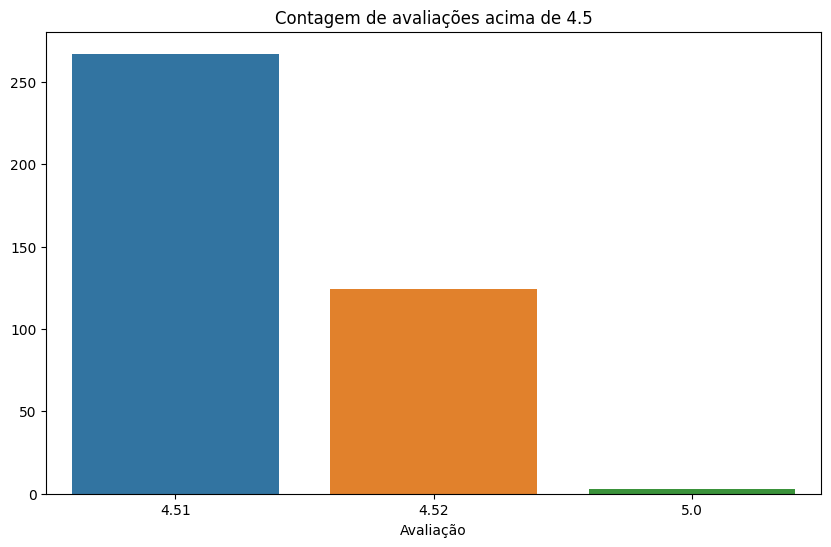

In [71]:
ratings_above_4_5 = dados[dados['rating'] > 4.5]
rating_counts = ratings_above_4_5['rating'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title('Contagem de avaliações acima de 4.5')
plt.xlabel('Avaliação')
plt.show()

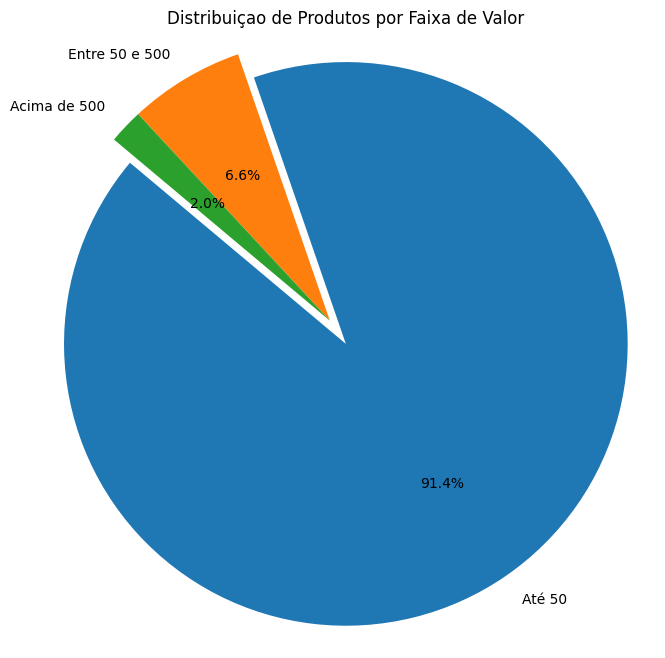

In [109]:
faixa1 = dados[dados['actual_price_real'] <= 50]
faixa2 = dados[(dados['actual_price_real'] > 50) & (dados['actual_price_real'] <= 500)]
faixa3 = dados[dados['actual_price_real'] > 500]

contagem_faixa1 = len(faixa1)
contagem_faixa2 = len(faixa2)
contagem_faixa3 = len(faixa3)

contagens = [contagem_faixa1, contagem_faixa2, contagem_faixa3]
faixas = ['Até 50', 'Entre 50 e 500', 'Acima de 500']
explode = (0.1, 0, 0)

plt.figure(figsize=(8,8))
plt.pie(contagens, labels=faixas, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribuiçao de Produtos por Faixa de Valor')
plt.axis('equal')
plt.show()

In [ ]:
!pip install pandas-profiling

In [114]:
import pandas_profiling

In [ ]:
dados.profile_report()